In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/keras-vggface')

In [ ]:
!pip install face_recognition
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_vggface
!pip install keras_applications
!pip install tensorflow
# !pip install arcface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=5b2d19de77377dccedea56c46e035425d4e68960961af78d257e65c548da96a1
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-hv_mt05m
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-hv_mt05m
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metad

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Activation
# from tensorflow.keras.models import Model
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# import arcface as af

# # Xây dựng một mô hình CNN đơn giản
# input_shape = (224, 224, 3)
# inputs = Input(shape=input_shape)
# x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Flatten()(x)
# x = Dense(512, activation='relu')(x)

# # Thêm lớp Activation ArcFace
# embedding_size = 128
# num_classes = 2

# # regularizer = tf.keras.regularizers.l2(0.1)
# # x = af.ArcFace.ArcFace(num_classes, regularizer=regularizer)(x)

# outputs = Activation('softmax')(x)

# model = Model(inputs=inputs, outputs=outputs)

# # Compile mô hình với hàm loss và optimizer phù hợp
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer=tf.keras.optimizers.Adam(learning_rate =0.0001),
#               metrics=['accuracy'])

# # Tạo ra các tham số huấn luyện
# batch_size = 32
# epochs = 10

# # Khởi tạo callbacks
# callbacks = [
#     EarlyStopping(monitor='loss', patience=3),
#     ModelCheckpoint(filepath='arcface_model.h5', monitor='loss', save_best_only=True),
# ]

# # Tạo ra các đối tượng ImageDataGenerator để thực hiện data augmentation
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)

# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# # Tạo ra các iterator cho tập train và tập validation
# train_generator = train_datagen.flow_from_directory(
#     '/content/drive/MyDrive/Colab Notebooks/keras-vggface/Headshots/',
#     target_size=(224, 224),
#     batch_size=batch_size,
#     class_mode='binary')

# validation_generator = test_datagen.flow_from_directory(
#     '/content/drive/MyDrive/Colab Notebooks/keras-vggface/FaceTest/',
#     target_size=(224, 224),
#     batch_size=batch_size,
#     class_mode='binary')

# # Huấn luyện mô hình
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size,
#     callbacks=callbacks)

# # Lưu mô hình đã được huấn luyện vào file
# model.save('arcface_model.h5')

In [ ]:
del model

In [ ]:
from keras_vggface.vggface import VGGFace

base_model = VGGFace(include_top=True,
    model='senet50',
    input_shape=(224, 224, 3))
base_model.summary()

print(len(base_model.layers))
# 26 layers in the original VGG-Face

175688524/175688524 [==============================] - 9s 0us/step
Model: "vggface_senet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)          

In [ ]:
base_model = VGGFace(include_top=False,
model='senet50',
input_shape=(224, 224, 3))
base_model.summary()
print(len(base_model.layers))
# 19 layers after excluding the last few layers

104944616/104944616 [==============================] - 6s 0us/step
Model: "vggface_senet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)          

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

# final layer with softmax activation
# preds = Dense(128, activation='softmax')(x)
preds = Dense(128)(x)

In [ ]:
# create a new model with the base model's original input and the
# new model's output
model = Model(inputs = base_model.input, outputs = preds)
model.summary()

# don't train the first 19 layers - 0..18
for layer in model.layers[:22]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model.layers[22:]:
    layer.trainable = True

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                             

In [ ]:
model.compile(optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
# # creates a HDF5 file
# model.save('vgg16_transfer_learning_trained_face_cnn_model.h5')

In [ ]:
# from tensorflow.keras.models import load_model

# # deletes the existing model
# del model

# # returns a compiled model identical to the previous one
# model = load_model('vgg16_transfer_learning_trained_face_cnn_model.h5')

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/keras-vggface/HuanLuyen',
                target_size=(224,224),
                color_mode='rgb',
                batch_size=32,
                class_mode='categorical',
                shuffle=True)

Found 136 images belonging to 17 classes.


In [ ]:
train_generator.class_indices.values()
# dict_values([0, 1, 2])
print(train_generator.class_indices.values())
NO_CLASSES = len(train_generator.class_indices.values())
print(NO_CLASSES)

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
17


In [ ]:
# # bo qua neu khong huan luyen mo hinh nx
# model.fit(train_generator,
#   batch_size = 1,
#   verbose = 1,
#   epochs = 10)

In [ ]:
import pickle

class_dictionary = train_generator.class_indices
class_dictionary = {
    value:key for key, value in class_dictionary.items()
}
print(class_dictionary)

{0: 'Can', 1: 'Cuong', 2: 'Dat', 3: 'Hung', 4: 'Huy', 5: 'Lich', 6: 'Long', 7: 'Manh', 8: 'Nghia', 9: 'Phuc', 10: 'Quoc', 11: 'Thai', 12: 'Thuan', 13: 'Toan', 14: 'Tri', 15: 'Tu', 16: 'Tung'}


In [ ]:
import cv2
import os
import pickle
import numpy as np
import pickle

from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras_vggface import utils

# dimension of images
image_width = 224
image_height = 224

# # load the training labels
# face_label_filename = 'face-labels.pickle'
# with open(face_label_filename, "rb") as \
#     f: class_dictionary = pickle.load(f)

class_list = [value for _, value in class_dictionary.items()]
print(class_list)

['Can', 'Cuong', 'Dat', 'Hung', 'Huy', 'Lich', 'Long', 'Manh', 'Nghia', 'Phuc', 'Quoc', 'Thai', 'Thuan', 'Toan', 'Tri', 'Tu', 'Tung']


In [ ]:
#face recognition

import tensorflow as tf
import face_recognition
import os
# # for detecting faces
# facecascade = \ cv2.CascadeClassifier(
#     'haarcascade_frontalface_default.xml')

encodeListKnow = []
classnames = []
folder_path = f'/content/drive/MyDrive/Colab Notebooks/keras-vggface/HuanLuyen'

for root, dirs, files in os.walk(folder_path):
  name = root.split("/")[-1]
  for file in files:
      if file.endswith("png") or file.endswith("jpg") or file.endswith("jpeg") or True:

          test_image_filename = os.path.join(root, file)
          namecorrect = file.split(" ")[0]
          # làm gì đó với file tại đường dẫn file_path
          imagetest = face_recognition.load_image_file(test_image_filename)
          imagetest = cv2.cvtColor(imagetest, cv2.COLOR_BGR2RGB)

          encodes = face_recognition.face_encodings(imagetest)

          # if not exactly 1 face is detected, skip this photo
          if len(encodes) == 0:
              print(f'---We need exactly 1 face; photo skipped---')
              continue
          print(encodes[0])
          encodeListKnow.append(encodes[0])
          classnames.append(name)
          print("------------------------------------------------------------------------------\n")

# save encodeListKnow + classnames in file know_face_encode.csv
# Create a DataFrame to store the face encodings
df = pd.DataFrame(encodeListKnow)
dfname = pd.DataFrame(classnames)

# Save the DataFrame to a CSV file
df.to_csv("/content/drive/MyDrive/Colab Notebooks/keras-vggface/SaveDir/know_face_encode.csv", index=False)
dfname.to_csv("/content/drive/MyDrive/Colab Notebooks/keras-vggface/SaveDir/know_face_classnames.csv", index=False)

[-8.91185477e-02  9.58821923e-02  3.66830826e-03 -3.06444112e-02
 -1.14489049e-02 -1.59638450e-02 -5.92898093e-02 -1.55777812e-01
  2.04217076e-01 -9.25563797e-02  2.50708759e-01 -5.45601286e-02
 -1.98926806e-01 -1.57915995e-01 -1.71022192e-02  1.98573202e-01
 -2.11719692e-01 -1.27629936e-01 -5.33907190e-02  1.39012933e-02
  7.40032047e-02 -8.39207470e-02  7.74863660e-02  6.13879040e-02
 -1.12005077e-01 -4.04738039e-01 -9.35941711e-02 -1.07800767e-01
  5.31540364e-02 -5.07007539e-02 -9.27985683e-02  4.28930297e-02
 -1.71557277e-01 -4.65151593e-02 -2.66537443e-02  8.82651433e-02
  2.19908357e-03 -3.81274298e-02  1.92977190e-01 -3.20056826e-02
 -2.39669085e-01 -5.84152341e-03  4.60328683e-02  2.11153761e-01
  2.89548874e-01  6.91499859e-02  3.99611481e-02 -1.31171480e-01
  1.28952339e-01 -1.32004499e-01  4.98090684e-02  1.29977331e-01
  7.18210340e-02  5.47933653e-02  1.52198374e-02 -1.11054815e-01
 -1.96892023e-02  1.24260738e-01 -1.48947060e-01 -3.67959961e-03
  9.11028013e-02 -7.81642

In [ ]:
#face recognition

import tensorflow as tf
import face_recognition
import os
# # for detecting faces
# facecascade = \ cv2.CascadeClassifier(
#     'haarcascade_frontalface_default.xml')

encodeListKnow = []
classnames = []
folder_path = f'/content/drive/MyDrive/Colab Notebooks/keras-vggface/KiemThuUnknow'
for file in os.listdir(folder_path):
    if file.endswith("png") or file.endswith("jpg") or file.endswith("jpeg"):

        test_image_filename = os.path.join(folder_path, file)
        namecorrect = file.split(" ")[0]

        # làm gì đó với file tại đường dẫn file_path
        imagetest = face_recognition.load_image_file(test_image_filename)
        imagetest = cv2.cvtColor(imagetest, cv2.COLOR_BGR2RGB)

        encodes = face_recognition.face_encodings(imagetest)

        # if not exactly 1 face is detected, skip this photo
        if len(encodes) == 0:
            print(f'---We need exactly 1 face; photo skipped---')
            continue
        print(encodes[0])
        encodeListKnow.append(encodes[0])
        classnames.append(namecorrect)
        print("------------------------------------------------------------------------------\n")

# save encodeListKnow + classnames in file know_face_encode.csv
# Create a DataFrame to store the face encodings
df = pd.DataFrame(encodeListKnow)
dfname = pd.DataFrame(classnames)

# Save the DataFrame to a CSV file
df.to_csv("/content/drive/MyDrive/Colab Notebooks/keras-vggface/SaveDir/unknow_face_encode.csv", index=False)
dfname.to_csv("/content/drive/MyDrive/Colab Notebooks/keras-vggface/SaveDir/unknow_face_classnames.csv", index=False)

[-0.08949411  0.09671962  0.03511036 -0.02863082 -0.04582013 -0.06708831
 -0.02289208 -0.13289541  0.10533163 -0.02820887  0.25097892 -0.08805606
 -0.26389068 -0.12840156 -0.03199313  0.15523152 -0.14099598 -0.12535049
 -0.04828513  0.06246979  0.12142402 -0.05497612  0.01805224  0.06309256
 -0.0785985  -0.30890554 -0.07632872 -0.09051012 -0.01037936 -0.04647548
 -0.09181374  0.04629099 -0.18902378 -0.12500153  0.0348579   0.11595666
 -0.0392083  -0.04066677  0.17972448  0.0351145  -0.27510035 -0.00208713
  0.04081453  0.25032127  0.17836484  0.09167265  0.03525104 -0.1169889
  0.13056755 -0.18422174  0.07136616  0.15205047  0.14547008  0.05965018
  0.0073644  -0.17489155  0.02401721  0.1048995  -0.12648977 -0.00541205
  0.08192424 -0.06731088 -0.00174126 -0.08358853  0.20218933  0.05943946
 -0.11113515 -0.14519167  0.10726269 -0.09976009 -0.12056714  0.11020186
 -0.19168188 -0.16517429 -0.34413278  0.0365327   0.40824258  0.04387583
 -0.18259205 -0.01730992 -0.05440139 -0.01205014  0.

In [ ]:
import tensorflow as tf
import face_recognition
import os
# # for detecting faces
# facecascade = \ cv2.CascadeClassifier(
#     'haarcascade_frontalface_default.xml')

encodeListKnow = []
classnames = []
dem = 0
folder_path = f'/content/drive/MyDrive/Colab Notebooks/keras-vggface/HuanLuyen'

for root, dirs, files in os.walk(folder_path):
  name = root.split("/")[-1]
  for file in files:
      if file.endswith("png") or file.endswith("jpg") or file.endswith("jpeg") or True:

          test_image_filename = os.path.join(root, file)
          namecorrect = file.split(" ")[0]
          # làm gì đó với file tại đường dẫn file_path
          imagetest = face_recognition.load_image_file(test_image_filename)
          imagetest = cv2.cvtColor(imagetest, cv2.COLOR_BGR2RGB)
          # # load the image
          # imgtest = cv2.imread(test_image_filename, cv2.IMREAD_COLOR)
          # image_array = np.array(imgtest, "uint8")

          # get the faces detected in the image
          # faces = facecascade.detectMultiScale(imgtest,
          #     scaleFactor=1.1, minNeighbors=5)
          faces = face_recognition.face_locations(imagetest)

          # if not exactly 1 face is detected, skip this photo
          if len(faces) == 0:
              print(f'---We need exactly 1 face; photo skipped---')
              continue
          dem += 1
          print(dem)
          for (y1, x2, y2, x1) in faces:
              # draw the face detected
              # face_detect = cv2.rectangle(
              #     imgtest, (x_, y_), (x_+w, y_+h), (255, 0, 255), 2)
              # plt.imshow(face_detect)
              # plt.show()

              # resize the detected face to 224x224
              size = (image_width, image_height)

              # # detected face region
              # roi = image_array[y_: y_ + h, x_: x_ + w]
              roi = imagetest[y1:y2, x1:x2]

              # resize the detected head to target size
              resized_image = cv2.resize(roi, size)

              # prepare the image for prediction
              x = tf.keras.preprocessing.image.img_to_array(resized_image)
              x = np.expand_dims(x, axis=0)
              x = utils.preprocess_input(x, version=1)



              # making prediction
              predicted_prob = model.predict(x)
              print(predicted_prob)
              # print(predicted_prob[0].argmax())
              encode = predicted_prob[0]
              encodeListKnow.append(encode)
              classnames.append(name)
              # nameguess = class_list[predicted_prob[0].argmax()]
              # print("Predicted face: " + nameguess)
              # if (nameguess.upper() == namecorrect.upper()):
              #   print('correct')
              #   NumCorrect = NumCorrect + 1
              # else:
              #   print('no')
              # NameGuess.append(nameguess)
          print("------------------------------------------------------------------------------\n")

# save encodeListKnow + classnames in file know_face_encode.csv
# Create a DataFrame to store the face encodings
df = pd.DataFrame(encodeListKnow)
dfname = pd.DataFrame(classnames)

# Save the DataFrame to a CSV file
df.to_csv("/content/drive/MyDrive/Colab Notebooks/keras-vggface/SaveDir/know_face_encode.csv", index=False)
dfname.to_csv("/content/drive/MyDrive/Colab Notebooks/keras-vggface/SaveDir/know_face_classnames.csv", index=False)

1
1/1 [==============================] - 9s 9s/step
[[-0.26956493  4.083147    0.9227907  -2.2056928   1.0092933   0.94970566
   2.3147683   1.752912   -0.44107467  0.7003063  -2.06214    -0.33758312
   1.6872429   0.66599345 -0.45487517 -2.9546752  -2.958363    0.32491338
  -4.322653    2.5763774  -0.32423282 -1.0037203  -0.6949129  -0.99362874
   4.6122212  -1.1037419  -0.5695108   4.4074144  -3.7486906  -3.388477
  -0.17305201  3.0779934  -0.49641     1.9278462   4.499792    0.9052434
   1.0189171   0.05998278  2.5078588  -2.0357838   0.89008844  1.0731285
   5.211097    3.9260578   5.456565    1.329019    2.4863455   2.1379015
   1.5459061  -1.5402781  -1.1318274   2.4118829  -3.8763287   1.7608738
  -0.4954097   1.0969265  -3.499711    3.5548224  -5.801403    1.6508026
   0.57286406 -0.28904396 -0.22959879  2.9761271   1.9342318  -0.9479914
  -1.5306277   1.5244613   0.12961626 -1.7895582  -0.07253605 -3.3825445
   2.904769    0.5697079  -0.71965635  2.5996702   1.1394658   0.1807

In [ ]:
import tensorflow as tf
import face_recognition
import os
# # for detecting faces
# facecascade = \ cv2.CascadeClassifier(
#     'haarcascade_frontalface_default.xml')

encodeListUnknow = []
classnamesCorrect = []

folder_path = f'/content/drive/MyDrive/Colab Notebooks/keras-vggface/KiemThuUnknow'
for file in os.listdir(folder_path):
    if file.endswith("png") or file.endswith("jpg") or file.endswith("jpeg"):

        test_image_filename = os.path.join(folder_path, file)
        namecorrect = file.split(" ")[0]
        # làm gì đó với file tại đường dẫn file_path
        imagetest = face_recognition.load_image_file(test_image_filename)
        imagetest = cv2.cvtColor(imagetest, cv2.COLOR_BGR2RGB)
        # # load the image
        # imgtest = cv2.imread(test_image_filename, cv2.IMREAD_COLOR)
        # image_array = np.array(imgtest, "uint8")

        # get the faces detected in the image
        # faces = facecascade.detectMultiScale(imgtest,
        #     scaleFactor=1.1, minNeighbors=5)
        faces = face_recognition.face_locations(imagetest)

        # if not exactly 1 face is detected, skip this photo
        if len(faces) == 0:
            print(f'---We need exactly 1 face; photo skipped---')
            continue

        for (y1, x2, y2, x1) in faces:
            # draw the face detected
            # face_detect = cv2.rectangle(
            #     imgtest, (x_, y_), (x_+w, y_+h), (255, 0, 255), 2)
            # plt.imshow(face_detect)
            # plt.show()

            # resize the detected face to 224x224
            size = (image_width, image_height)

            # # detected face region
            # roi = image_array[y_: y_ + h, x_: x_ + w]
            roi = imagetest[y1:y2, x1:x2]

            # resize the detected head to target size
            resized_image = cv2.resize(roi, size)

            # prepare the image for prediction
            x = tf.keras.preprocessing.image.img_to_array(resized_image)
            x = np.expand_dims(x, axis=0)
            x = utils.preprocess_input(x, version=1)



            # making prediction
            predicted_prob = model.predict(x)
            print(predicted_prob)
            print(predicted_prob[0].argmax())
            encode = predicted_prob[0]
            encodeListUnknow.append(encode)
            classnamesCorrect.append(namecorrect)
            # nameguess = class_list[predicted_prob[0].argmax()]
            # print("Predicted face: " + nameguess)
            # if (nameguess.upper() == namecorrect.upper()):
            #   print('correct')
            #   NumCorrect = NumCorrect + 1
            # else:
            #   print('no')
            # NameGuess.append(nameguess)
        print("------------------------------------------------------------------------------\n")

# save encodeListKnow + classnames in file know_face_encode.csv
# Create a DataFrame to store the face encodings
df = pd.DataFrame(encodeListUnknow)
dfname = pd.DataFrame(classnamesCorrect)

# Save the DataFrame to a CSV file
df.to_csv("/content/drive/MyDrive/Colab Notebooks/keras-vggface/SaveDir/unknow_face_encode.csv", index=False)
dfname.to_csv("/content/drive/MyDrive/Colab Notebooks/keras-vggface/SaveDir/unknow_face_classnames.csv", index=False)

1/1 [==============================] - 0s 27ms/step
[[-0.53045386  0.9457855   1.5789995  -3.2385747  -1.2141137   1.0271857
   3.1369867   1.8352776   0.06488132  1.857828   -0.5196238   1.0040784
  -2.4462698   1.0079002   0.3125168  -1.3250284  -2.3248806  -0.12546223
  -4.641073    3.2649524   0.88812065  2.4764717  -0.96550936 -2.4677055
   2.3996687   0.28011093 -0.69156665  1.9216576  -1.5681095  -0.8592678
   0.36779946  2.764275   -1.6763387   3.429437    3.01207     2.814642
   0.9173939   0.2802134   1.0440391  -0.5791234   2.7786195   1.1696968
   5.106937    4.070546    6.090956    3.448358    1.1714215   1.9915228
   0.16768467 -1.4006903  -1.0685695   1.9123163  -2.6819534   3.5293398
  -2.3143919   0.7438773   0.12259877  0.29875857 -3.8863711   3.8258784
   0.95818985  1.0255334   0.8873842   5.0307703   2.7821417  -0.19392651
  -1.317564    2.1350274   1.8682733  -3.2242806  -3.3521848  -2.9152443
   0.7015654   0.32599008 -0.93507195  0.63603187 -0.26681685  0.270744

In [ ]:
# distance.py

import face_recognition
import numpy as np
from datetime import datetime
import pandas as pd
import os

#path main
pathmain = '/content/drive/MyDrive/Colab Notebooks/keras-vggface/SaveDir'

# read encodeListKnow + classnames
df = pd.read_csv(os.path.join(pathmain, 'know_face_encode.csv'))
encodeListKnow = list(np.array(df))
dfname = pd.read_csv(os.path.join(pathmain, 'know_face_classnames.csv'))
classnames = list(map( lambda x: x[0],  list(np.array(dfname))))
print(classnames)
# read encodeListUnKnow + classnames
dfUnknow = pd.read_csv(os.path.join(pathmain, 'unknow_face_encode.csv'))
encodeListUnknow = list(np.array(dfUnknow))
dfnameCorrect = pd.read_csv(os.path.join(pathmain, 'unknow_face_classnames.csv'))
classnamesCorrect = list(map( lambda x: x[0],  list(np.array(dfnameCorrect))))
print(classnamesCorrect)

def thamdu(name):
    with open(f"/content/drive/MyDrive/Du Lieu PBL/SaveDir/thamdu.csv", "r+") as f:
        myDatalist = f.readlines()
        nameList = []
        timeList = []
        for line in myDatalist:
            entry = line.split(",")
            nameList.append(entry[0])
            timeList.append(entry[1])

        if name not in nameList:
            now = datetime.now()
            dtstring = now.strftime("%H:%M:%S")
            f.writelines(f"\n{name},{dtstring}")
        else:
            # thay doi thoi gian truoc do thanh thoi gian sau
            indexSearch = nameList.index(name)
            timeList[indexSearch] = datetime.now().strftime("%H:%M:%S")
            if indexSearch != len(timeList)-1:
                timeList[indexSearch] += "\n"
            with open(f"/content/drive/MyDrive/Du Lieu PBL/SaveDir/thamdu.csv", "w") as f1:
                for name1, time in zip(nameList, timeList):
                    f1.writelines(f"{name1},{time}")


classnames_guess = []

for encodeFaceNotKnow in encodeListUnknow:
    # matches = face_recognition.compare_faces(encodeListKnow, encodeFaceNotKnow)
    # print(matches)
    faceDis = face_recognition.face_distance(encodeListKnow, encodeFaceNotKnow)
    print(faceDis)
    matchIndex = np.argmin(faceDis)
    if faceDis[matchIndex] < 15:   #LBP: 0.04
        print(matchIndex)
        name = classnames[matchIndex].upper()
        thamdu(name)
    else:
        name = "UNKNOW"
    classnames_guess.append(name)

dfname_guess = pd.DataFrame(classnames_guess)

# Save the DataFrame to a CSV file
dfname_guess.to_csv(os.path.join(pathmain, '/unknow_classnames_guess.csv'), index=False)

# calc hiệu suất của thuật toán
exactly = 0
for correct, guess in zip(classnamesCorrect, classnames_guess):
    print(correct, guess)
    # if guess!='UNKNOW':
    #     guess = guess[guess.index('_'):]
    # if correct!= 'UNKNOW':
    #     correct = correct[correct.index('_'):]
    exactly += 1 if guess.upper()==correct.upper() else 0
efficiency = exactly/len(classnamesCorrect) *100
print("efficiency: ", efficiency, "%")

['Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Toan', 'Toan', 'Toan', 'Toan', 'Toan', 'Toan', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Thai', 'Thai', 'Thai', 'Thai', 'Thai', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Lich', 'Lich', 'Lich', 'Lich', 'Lich', 'Lich', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Long', 'Long', 'Long', 'Huy', 'Huy', 'Huy', 'Huy', 'Huy', 'Huy', 'Huy', 'Huy', 'Huy', 'Dat', 'Dat', 'Dat', 'Dat']
['UNKNOW', 'UNKN

In [ ]:
# distance.py

import face_recognition
import numpy as np
from datetime import datetime
import pandas as pd
import os

#path main
pathmain = '/content/drive/MyDrive/Colab Notebooks/keras-vggface/SaveDir'

# read encodeListKnow + classnames
df = pd.read_csv(os.path.join(pathmain, 'know_face_encode.csv'))
encodeListKnow = list(np.array(df))
dfname = pd.read_csv(os.path.join(pathmain, 'know_face_classnames.csv'))
classnames = list(map( lambda x: x[0],  list(np.array(dfname))))
print(classnames)
# read encodeListUnKnow + classnames
dfUnknow = pd.read_csv(os.path.join(pathmain, 'unknow_face_encode.csv'))
encodeListUnknow = list(np.array(dfUnknow))
dfnameCorrect = pd.read_csv(os.path.join(pathmain, 'unknow_face_classnames.csv'))
classnamesCorrect = list(map( lambda x: x[0],  list(np.array(dfnameCorrect))))
print(classnamesCorrect)

def thamdu(name):
    with open(f"/content/drive/MyDrive/Du Lieu PBL/SaveDir/thamdu.csv", "r+") as f:
        myDatalist = f.readlines()
        nameList = []
        timeList = []
        for line in myDatalist:
            entry = line.split(",")
            nameList.append(entry[0])
            timeList.append(entry[1])

        if name not in nameList:
            now = datetime.now()
            dtstring = now.strftime("%H:%M:%S")
            f.writelines(f"\n{name},{dtstring}")
        else:
            # thay doi thoi gian truoc do thanh thoi gian sau
            indexSearch = nameList.index(name)
            timeList[indexSearch] = datetime.now().strftime("%H:%M:%S")
            if indexSearch != len(timeList)-1:
                timeList[indexSearch] += "\n"
            with open(f"/content/drive/MyDrive/Du Lieu PBL/SaveDir/thamdu.csv", "w") as f1:
                for name1, time in zip(nameList, timeList):
                    f1.writelines(f"{name1},{time}")

accuracy_list = []
for i in range(0, 21, 1):
  nguong = 14 + i/10
  classnames_guess = []
  for encodeFaceNotKnow in encodeListUnknow:
      # matches = face_recognition.compare_faces(encodeListKnow, encodeFaceNotKnow)
      # print(matches)
      faceDis = face_recognition.face_distance(encodeListKnow, encodeFaceNotKnow)
      # print(faceDis)
      matchIndex = np.argmin(faceDis)
      if faceDis[matchIndex] < nguong:   #LBP: 0.04
          # print(matchIndex)
          name = classnames[matchIndex].upper()
          thamdu(name)
      else:
          name = "UNKNOW"
      classnames_guess.append(name)

  dfname_guess = pd.DataFrame(classnames_guess)

  # Save the DataFrame to a CSV file
  dfname_guess.to_csv(os.path.join(pathmain, '/unknow_classnames_guess.csv'), index=False)

  # calc hiệu suất của thuật toán
  exactly = 0
  for correct, guess in zip(classnamesCorrect, classnames_guess):
      # print(correct, guess)
      # if guess!='UNKNOW':
      #     guess = guess[guess.index('_'):]
      # if correct!= 'UNKNOW':
      #     correct = correct[correct.index('_'):]
      exactly += 1 if guess.upper()==correct.upper() else 0
  efficiency = exactly/len(classnamesCorrect) *100
  accuracy_list.append(efficiency)
  print("efficiency: ", efficiency, "%")

print("accuracy_list", accuracy_list)

['Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Toan', 'Toan', 'Toan', 'Toan', 'Toan', 'Toan', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Thai', 'Thai', 'Thai', 'Thai', 'Thai', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Lich', 'Lich', 'Lich', 'Lich', 'Lich', 'Lich', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Long', 'Long', 'Long', 'Huy', 'Huy', 'Huy', 'Huy', 'Huy', 'Huy', 'Huy', 'Huy', 'Huy', 'Dat', 'Dat', 'Dat', 'Dat']
['UNKNOW', 'UNKN

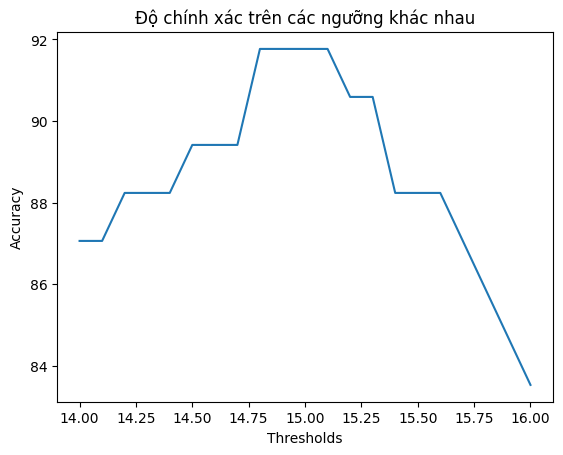

In [ ]:
import matplotlib.pyplot as plt

# Tạo dữ liệu cho đồ thị
thresholds = [(14 + i/10) for i in range(0, 21)]
accuracies = range(1, 22)

# Vẽ đồ thị
plt.plot(thresholds, accuracy_list)

# Thêm tiêu đề và nhãn cho các trục
plt.title("Độ chính xác trên các ngưỡng khác nhau")
plt.xlabel("Thresholds")
plt.ylabel("Accuracy")

# Hiển thị đồ thị
plt.show()

In [ ]:
# distance_mean.py

import face_recognition
import numpy as np
from datetime import datetime
import pandas as pd

parent_path = '/content/drive/MyDrive/Colab Notebooks/keras-vggface'

# read encodeListKnow + classnames
df = pd.read_csv(f'{parent_path}/SaveDir/know_face_encode.csv')
encodeListKnow = list(np.array(df))
dfname = pd.read_csv(f'{parent_path}/SaveDir/know_face_classnames.csv')
classnames = list(map( lambda x: x[0],  list(np.array(dfname))))
# print(encodeListKnow)
print(classnames)
# read encodeListUnKnow + classnames
dfUnknow = pd.read_csv(f'{parent_path}/SaveDir/unknow_face_encode.csv')
encodeListUnknow = list(np.array(dfUnknow))
dfnameCorrect = pd.read_csv(f'{parent_path}/SaveDir/unknow_face_classnames.csv')
classnamesCorrect = list(map( lambda x: x[0],  list(np.array(dfnameCorrect))))
print(classnamesCorrect)

def thamdu(name):
    with open(f"{parent_path}/SaveDir/thamdu.csv", "r+") as f:
        myDatalist = f.readlines()
        nameList = []
        timeList = []
        for line in myDatalist:
            entry = line.split(",")
            nameList.append(entry[0])
            timeList.append(entry[1])

        if name not in nameList:
            now = datetime.now()
            dtstring = now.strftime("%H:%M:%S")
            f.writelines(f"\n{name},{dtstring}")
        else:
            # thay doi thoi gian truoc do thanh thoi gian sau
            indexSearch = nameList.index(name)
            timeList[indexSearch] = datetime.now().strftime("%H:%M:%S")
            if indexSearch != len(timeList)-1:
                timeList[indexSearch] += "\n"
            with open(f"{parent_path}/SaveDir/thamdu.csv", "w") as f1:
                for name1, time in zip(nameList, timeList):
                    f1.writelines(f"{name1},{time}")

names = np.unique(classnames)
print(names)
dict_name_index = {}
for name in names:
    indexs = [vt for vt in range(len(classnames)) if classnames[vt]==name]
    dict_name_index[name] = indexs

print(dict_name_index)

encodeListKnowNew = []
feature_means = {}
for name in names:
    encodes = [encodeListKnow[i] for i in dict_name_index[name]]
    feature_data = [[float(i) for i in row] for row in encodes]
    encodeListKnowNew.append(np.mean(feature_data, axis=0))

print(encodeListKnowNew)

classnames_guess = []

for encodeFaceNotKnow in encodeListUnknow:
    # matches = face_recognition.compare_faces(encodeListKnow, encodeFaceNotKnow)
    # print(matches)
    # faceDis = face_recognition.face_distance(encodeListKnow, encodeFaceNotKnow)
    faceDis = face_recognition.face_distance(encodeListKnowNew, encodeFaceNotKnow)
    print(faceDis)
    matchIndex = np.argmin(faceDis)
    if faceDis[matchIndex] < 0.38:
        print(matchIndex)
        name = names[matchIndex].upper()
        # name = classnames[matchIndex].upper()
        # thamdu(name)
    else:
        name = "UNKNOW"
    classnames_guess.append(name)

dfname_guess = pd.DataFrame(classnames_guess)

# Save the DataFrame to a CSV file
dfname_guess.to_csv(f"{parent_path}/SaveDir/unknow_classnames_guess.csv", index=False)

# calc hiệu suất của thuật toán
exactly = 0
for correct, guess in zip(classnamesCorrect, classnames_guess):
    print(correct, guess)
    # if guess!='UNKNOW':
    #     guess = guess[guess.index('_'):]
    # if correct!='UNKNOW':
    #     correct = correct[correct.index('_'):]
    exactly += 1 if guess.upper()==correct.upper() else 0
efficiency = exactly/len(classnamesCorrect) *100
print("efficiency: ", efficiency, "%")

['Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Toan', 'Toan', 'Toan', 'Toan', 'Toan', 'Toan', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Thai', 'Thai', 'Thai', 'Thai', 'Thai', 'Thai', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Lich', 'Lich', 'Lich', 'Lich', 'Lich', 'Lich', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Huy', 'H

In [ ]:
# LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd

parent_path = '/content/drive/MyDrive/Colab Notebooks/keras-vggface'

# read encodeListKnow + classnames
dfKnow = pd.read_csv(f'{parent_path}/SaveDir/know_face_encode.csv')
encodeListKnow = list(np.array(dfKnow))
dfname = pd.read_csv(f'{parent_path}/SaveDir/know_face_classnames.csv')
classnames = list(map( lambda x: x[0],  list(np.array(dfname))))
print(classnames)
# read encodeListUnKnow + classnames
dfUnknow = pd.read_csv(f'{parent_path}/SaveDir/unknow_face_encode.csv')
encodeListUnknow = list(np.array(dfUnknow))
dfnameCorrect = pd.read_csv(f'{parent_path}/SaveDir/unknow_face_classnames.csv')

classnamesCorrect = list(map( lambda x: x[0],  list(np.array(dfnameCorrect))))
print(classnamesCorrect)


# Các vector đặc trưng của các khuôn mặt đã biết
known_faces = np.array(encodeListKnow)

# Nhãn của các khuôn mặt đã biết
known_labels = np.array(classnames)

# Các vector đặc trưng của các khuôn mặt chưa biết
unknown_faces = np.array(encodeListUnknow)

# Khởi tạo mô hình LDA
lda = LinearDiscriminantAnalysis()

# Huấn luyện mô hình LDA với các vector đặc trưng đã biết và nhãn tương ứng
lda.fit(known_faces, known_labels)

# Dự đoán nhãn của các khuôn mặt chưa biết bằng cách sử dụng mô hình LDA đã huấn luyện
predicted_labels = lda.predict(unknown_faces)

# Lấy giá trị số liệu thực thể của các điểm dữ liệu trong tập kiểm tra
confidence_scores = lda.predict_proba(unknown_faces)

# In kết quả dự đoán và giá trị số liệu thực thể của mô hình
for i in range(len(unknown_faces)):
    print("Dự đoán: ", predicted_labels[i], " - Giá trị số liệu thực thể: ", confidence_scores[i])
    max_index = np.argmax(confidence_scores[i])
    if confidence_scores[i][max_index] < 0.5:
      predicted_labels[i] = 'UNKNOW'
    # print("check: ", known_labels_unique[max_index])

# Save guess classnames
dfnameGuess = pd.DataFrame(predicted_labels)
dfnameGuess.to_csv(f"{parent_path}/SaveDir/unknow_classnames_guess.csv", index=False)

# In ra các nhãn được dự đoán
print("guess:", predicted_labels)
# In ra các nhãn được chính xác
print("correct:", classnamesCorrect)

# Tinh hieu suat
count = 0
for guess, correct in zip(predicted_labels, classnamesCorrect):
    # if guess != 'UNKNOW':
    #     guess = guess[guess.index('_'):]
    # if correct!='UNKNOW':
    #     correct = correct[correct.index('_'):]
    count += 1 if guess.upper()==correct.upper() else 0

print("hieu suat: ", count/len(classnamesCorrect)*100, "%")

['Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Toan', 'Toan', 'Toan', 'Toan', 'Toan', 'Toan', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Thai', 'Thai', 'Thai', 'Thai', 'Thai', 'Thai', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Lich', 'Lich', 'Lich', 'Lich', 'Lich', 'Lich', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Huy', 'H

In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

parent_path = '/content/drive/MyDrive/Colab Notebooks/keras-vggface'

# read encodeListKnow + classnames
dfKnow = pd.read_csv(f'{parent_path}/SaveDir/know_face_encode.csv')
encodeListKnow = list(np.array(dfKnow))
dfname = pd.read_csv(f'{parent_path}/SaveDir/know_face_classnames.csv')
classnames = list(map( lambda x: x[0],  list(np.array(dfname))))
print(classnames)
# read encodeListUnKnow + classnames
dfUnknow = pd.read_csv(f'{parent_path}/SaveDir/unknow_face_encode.csv')
encodeListUnknow = list(np.array(dfUnknow))
dfnameCorrect = pd.read_csv(f'{parent_path}/SaveDir/unknow_face_classnames.csv')

classnamesCorrect = list(map( lambda x: x[0],  list(np.array(dfnameCorrect))))
print(classnamesCorrect)


# Các vector đặc trưng của các khuôn mặt đã biết
known_faces = np.array(encodeListKnow)

# Nhãn của các khuôn mặt đã biết
known_labels = np.array(classnames)

# Các vector đặc trưng của các khuôn mặt chưa biết
unknown_faces = np.array(encodeListUnknow)

# Khởi tạo mô hình LDA
knn = KNeighborsClassifier(n_neighbors=3)

# Huấn luyện mô hình LDA với các vector đặc trưng đã biết và nhãn tương ứng
knn.fit(known_faces, known_labels)

# Dự đoán nhãn của các khuôn mặt chưa biết bằng cách sử dụng mô hình LDA đã huấn luyện
predicted_labels = knn.predict(unknown_faces)

# Save guess classnames
dfnameGuess = pd.DataFrame(predicted_labels)
dfnameGuess.to_csv(f"{parent_path}/SaveDir/unknow_classnames_guess.csv", index=False)

# In ra các nhãn được dự đoán
print("guess:", predicted_labels)
# In ra các nhãn được chính xác
print("correct:", classnamesCorrect)

# Tinh hieu suat
count = 0
for guess, correct in zip(predicted_labels, classnamesCorrect):
    # if guess != 'UNKNOW':
    #     guess = guess[guess.index('_'):]
    # if correct!='UNKNOW':
    #     correct = correct[correct.index('_'):]
    count += 1 if guess.upper()==correct.upper() else 0

print("hieu suat: ", count/len(classnamesCorrect)*100, "%")

['Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Toan', 'Toan', 'Toan', 'Toan', 'Toan', 'Toan', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Thai', 'Thai', 'Thai', 'Thai', 'Thai', 'Thai', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Lich', 'Lich', 'Lich', 'Lich', 'Lich', 'Lich', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Huy', 'H

In [ ]:
# SVM

from sklearn.svm import SVC
import numpy as np
import pandas as pd

parent_path = '/content/drive/MyDrive/Colab Notebooks/keras-vggface'

# read encodeListKnow + classnames
dfKnow = pd.read_csv(f'{parent_path}/SaveDir/know_face_encode.csv')
encodeListKnow = list(np.array(dfKnow))
dfname = pd.read_csv(f'{parent_path}/SaveDir/know_face_classnames.csv')
classnames = list(map( lambda x: x[0],  list(np.array(dfname))))
print(classnames)
# read encodeListUnKnow + classnames
dfUnknow = pd.read_csv(f'{parent_path}/SaveDir/unknow_face_encode.csv')
encodeListUnknow = list(np.array(dfUnknow))
dfnameCorrect = pd.read_csv(f'{parent_path}/SaveDir/unknow_face_classnames.csv')

classnamesCorrect = list(map( lambda x: x[0],  list(np.array(dfnameCorrect))))
print(classnamesCorrect)


# Các vector đặc trưng của các khuôn mặt đã biết
known_faces = np.array(encodeListKnow)

# Nhãn của các khuôn mặt đã biết
known_labels = np.array(classnames)

# Nhãn unique
known_labels_unique = np.unique(known_labels)
print('know label unique', known_labels_unique)

# Các vector đặc trưng của các khuôn mặt chưa biết
unknown_faces = np.array(encodeListUnknow)

# Khởi tạo mô hình LDA
clf = SVC(kernel='linear', C=1)

# Huấn luyện mô hình LDA với các vector đặc trưng đã biết và nhãn tương ứng
clf.fit(known_faces, known_labels)

# Dự đoán nhãn của các khuôn mặt chưa biết bằng cách sử dụng mô hình LDA đã huấn luyện
predicted_labels = clf.predict(unknown_faces)

# Lấy giá trị số liệu thực thể của các điểm dữ liệu trong tập kiểm tra
confidence_scores = clf.decision_function(unknown_faces)

# In kết quả dự đoán và giá trị số liệu thực thể của mô hình
for i in range(len(unknown_faces)):
    print("Dự đoán: ", predicted_labels[i], " - Giá trị số liệu thực thể: ", confidence_scores[i])
    max_index = np.argmax(confidence_scores[i])
    if confidence_scores[i][max_index] < 16:
      predicted_labels[i] = 'UNKNOW'
    # print("check: ", known_labels_unique[max_index])

# Save guess classnames
dfnameGuess = pd.DataFrame(predicted_labels)
dfnameGuess.to_csv(f"{parent_path}/SaveDir/unknow_classnames_guess.csv", index=False)

# In ra các nhãn được dự đoán
print("guess:", predicted_labels)
# In ra các nhãn được chính xác
print("correct:", classnamesCorrect)

# Tinh hieu suat
count = 0
for guess, correct in zip(predicted_labels, classnamesCorrect):
    if guess == 'UNKNO':
        guess = 'UNKNOW'
    # if correct!='UNKNOW':
    #     correct = correct[correct.index('_'):]
    count += 1 if guess.upper()==correct.upper() else 0

print("hieu suat: ", count/len(classnamesCorrect)*100, "%")

['Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Toan', 'Toan', 'Toan', 'Toan', 'Toan', 'Toan', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Thai', 'Thai', 'Thai', 'Thai', 'Thai', 'Thai', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Lich', 'Lich', 'Lich', 'Lich', 'Lich', 'Lich', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Huy', 'H

In [ ]:
# Gradient Booting

from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd

parent_path = '/content/drive/MyDrive/Colab Notebooks/keras-vggface'

# read encodeListKnow + classnames
dfKnow = pd.read_csv(f'{parent_path}/SaveDir/know_face_encode.csv')
encodeListKnow = list(np.array(dfKnow))
dfname = pd.read_csv(f'{parent_path}/SaveDir/know_face_classnames.csv')
classnames = list(map( lambda x: x[0],  list(np.array(dfname))))
print(classnames)
# read encodeListUnKnow + classnames
dfUnknow = pd.read_csv(f'{parent_path}/SaveDir/unknow_face_encode.csv')
encodeListUnknow = list(np.array(dfUnknow))
dfnameCorrect = pd.read_csv(f'{parent_path}/SaveDir/unknow_face_classnames.csv')

classnamesCorrect = list(map( lambda x: x[0],  list(np.array(dfnameCorrect))))
print(classnamesCorrect)


# Các vector đặc trưng của các khuôn mặt đã biết
known_faces = np.array(encodeListKnow)

# Nhãn của các khuôn mặt đã biết
known_labels = np.array(classnames)

# Nhãn unique
known_labels_unique = np.unique(known_labels)
print('know label unique', known_labels_unique)

# Các vector đặc trưng của các khuôn mặt chưa biết
unknown_faces = np.array(encodeListUnknow)

# Khởi tạo mô hình Random Forest
gb = GradientBoostingClassifier(n_estimators=30, random_state=2)

# Huấn luyện mô hình LDA với các vector đặc trưng đã biết và nhãn tương ứng
gb.fit(known_faces, known_labels)

# Dự đoán nhãn của các khuôn mặt chưa biết bằng cách sử dụng mô hình LDA đã huấn luyện
predicted_labels = gb.predict(unknown_faces)

# Lấy giá trị số liệu thực thể của các điểm dữ liệu trong tập kiểm tra
confidence_scores = gb.decision_function(unknown_faces)

# In kết quả dự đoán và giá trị số liệu thực thể của mô hình
for i in range(len(unknown_faces)):
    print("Dự đoán: ", predicted_labels[i], " - Giá trị số liệu thực thể: ", confidence_scores[i])
    max_index = np.argmax(confidence_scores[i])
    if confidence_scores[i][max_index] < -5:
      predicted_labels[i] = 'UNKNOW '
    # print("check: ", known_labels_unique[max_index])

# Save guess classnames
dfnameGuess = pd.DataFrame(predicted_labels)
dfnameGuess.to_csv(f"{parent_path}/SaveDir/unknow_classnames_guess.csv", index=False)

# In ra các nhãn được dự đoán
print("guess:", predicted_labels)
# In ra các nhãn được chính xác
print("correct:", classnamesCorrect)

# Tinh hieu suat
count = 0
for guess, correct in zip(predicted_labels, classnamesCorrect):
    if guess == 'UNKNO':
        guess = 'UNKNOW'
    # if correct!='UNKNOW':
    #     correct = correct[correct.index('_'):]
    count += 1 if guess.upper()==correct.upper() else 0

print("hieu suat: ", count/len(classnamesCorrect)*100, "%")

['Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Toan', 'Toan', 'Toan', 'Toan', 'Toan', 'Toan', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Thai', 'Thai', 'Thai', 'Thai', 'Thai', 'Thai', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Lich', 'Lich', 'Lich', 'Lich', 'Lich', 'Lich', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Huy', 'H

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

parent_path = '/content/drive/MyDrive/Colab Notebooks/keras-vggface'

# read encodeListKnow + classnames
dfKnow = pd.read_csv(f'{parent_path}/SaveDir/know_face_encode.csv')
encodeListKnow = list(np.array(dfKnow))
dfname = pd.read_csv(f'{parent_path}/SaveDir/know_face_classnames.csv')
classnames = list(map( lambda x: x[0],  list(np.array(dfname))))
print(classnames)
# read encodeListUnKnow + classnames
dfUnknow = pd.read_csv(f'{parent_path}/SaveDir/unknow_face_encode.csv')
encodeListUnknow = list(np.array(dfUnknow))
dfnameCorrect = pd.read_csv(f'{parent_path}/SaveDir/unknow_face_classnames.csv')

classnamesCorrect = list(map( lambda x: x[0],  list(np.array(dfnameCorrect))))
print(classnamesCorrect)


# Các vector đặc trưng của các khuôn mặt đã biết
known_faces = np.array(encodeListKnow)

# Nhãn của các khuôn mặt đã biết
known_labels = np.array(classnames)

# Nhãn unique
known_labels_unique = np.unique(known_labels)
print('know label unique', known_labels_unique)

# Các vector đặc trưng của các khuôn mặt chưa biết
unknown_faces = np.array(encodeListUnknow)

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=2)

# Huấn luyện mô hình LDA với các vector đặc trưng đã biết và nhãn tương ứng
rf.fit(known_faces, known_labels)

# Dự đoán nhãn của các khuôn mặt chưa biết bằng cách sử dụng mô hình LDA đã huấn luyện
predicted_labels = rf.predict(unknown_faces)

# Lấy giá trị số liệu thực thể của các điểm dữ liệu trong tập kiểm tra
confidence_scores = rf.predict_proba(unknown_faces)

# In kết quả dự đoán và giá trị số liệu thực thể của mô hình
for i in range(len(unknown_faces)):
    print("Dự đoán: ", predicted_labels[i], " - Giá trị số liệu thực thể: ", confidence_scores[i])
    max_index = np.argmax(confidence_scores[i])
    if confidence_scores[i][max_index] < 0.15:
      predicted_labels[i] = 'UNKNOW'
    # print("check: ", known_labels_unique[max_index])

# Save guess classnames
dfnameGuess = pd.DataFrame(predicted_labels)
dfnameGuess.to_csv(f"{parent_path}/SaveDir/unknow_classnames_guess.csv", index=False)

# In ra các nhãn được dự đoán
print("guess:", predicted_labels)
# In ra các nhãn được chính xác
print("correct:", classnamesCorrect)

# Tinh hieu suat
count = 0
for guess, correct in zip(predicted_labels, classnamesCorrect):
    # if guess != 'UNKNOW':
    #     guess = guess[guess.index('_'):]
    # if correct!='UNKNOW':
    #     correct = correct[correct.index('_'):]
    count += 1 if guess.upper()==correct.upper() else 0

print("hieu suat: ", count/len(classnamesCorrect)*100, "%")

['Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Manh', 'Toan', 'Toan', 'Toan', 'Toan', 'Toan', 'Toan', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tri', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Tu', 'Thai', 'Thai', 'Thai', 'Thai', 'Thai', 'Thai', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Quoc', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Nghia', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Phuc', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Thuan', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Tung', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Can', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Cuong', 'Lich', 'Lich', 'Lich', 'Lich', 'Lich', 'Lich', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Hung', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Huy', 'H